In [13]:
import os
print("Train Directory Exists:", os.path.exists(TRAIN_DIR))
print("Validation Directory Exists:", os.path.exists(VAL_DIR))

Train Directory Exists: True
Validation Directory Exists: True


In [12]:
# Paths
DATA_DIR = "/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /Brain Tumor MRI Dataset"

# Update paths to cleaned data
TRAIN_DIR = "/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /Brain Tumor MRI Dataset/cleaned/Training"
VAL_DIR   = "/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /Brain Tumor MRI Dataset/cleaned/Testing"

IMG_SIZE    = (224, 224)
BATCH_SIZE  = 32
NUM_CLASSES = 4

# Automatically detect class names from the cleaned training directory
CLASS_NAMES = sorted(os.listdir(TRAIN_DIR))
print("Class Names:", CLASS_NAMES)

Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [14]:
# Verify class folders in Training and Testing directories
print("Training Classes:", os.listdir(TRAIN_DIR))
print("Validation Classes:", os.listdir(VAL_DIR))

# Check the number of images in each class
for cls in os.listdir(TRAIN_DIR):
    cls_path = os.path.join(TRAIN_DIR, cls)
    print(f"Training - {cls}: {len(os.listdir(cls_path))} images")

for cls in os.listdir(VAL_DIR):
    cls_path = os.path.join(VAL_DIR, cls)
    print(f"Validation - {cls}: {len(os.listdir(cls_path))} images")

Training Classes: ['pituitary', 'notumor', 'glioma', 'meningioma']
Validation Classes: ['pituitary', 'notumor', 'glioma', 'meningioma']
Training - pituitary: 1457 images
Training - notumor: 1595 images
Training - glioma: 1321 images
Training - meningioma: 1339 images
Validation - pituitary: 300 images
Validation - notumor: 405 images
Validation - glioma: 300 images
Validation - meningioma: 306 images


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1/255.)

# Load data
train_ds = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_ds = val_gen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
# Verify data loading
print("Class Indices:", train_ds.class_indices)
print("Number of Training Samples:", train_ds.samples)
print("Number of Validation Samples:", val_ds.samples)

Class Indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Number of Training Samples: 5712
Number of Validation Samples: 1311


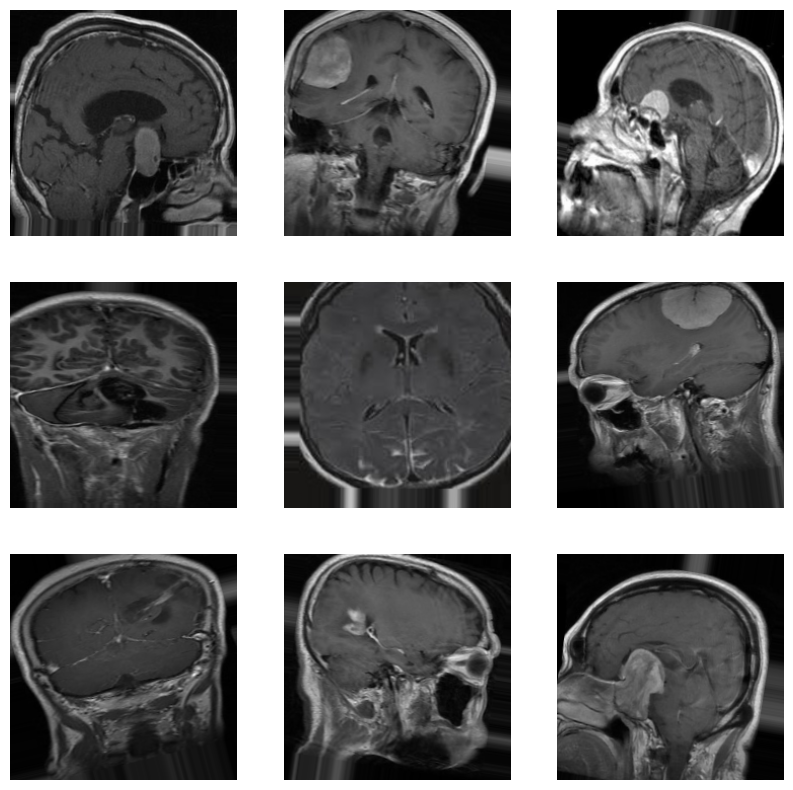

In [18]:
import matplotlib.pyplot as plt

# Visualize a few training samples
x_batch, y_batch = next(train_ds)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers, callbacks

# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
base_model = MobileNetV2(
    weights= '/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5',
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)

In [25]:
import os

weights_path = '/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
print("Weights file exists:", os.path.exists(weights_path))

Weights file exists: True


In [26]:
weights_path = "./mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"
base_model = MobileNetV2(
    weights=weights_path,
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)

In [27]:
# Verify data loading
print("Class Indices:", train_ds.class_indices)
print("Number of Training Samples:", train_ds.samples)
print("Number of Validation Samples:", val_ds.samples)

Class Indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Number of Training Samples: 5712
Number of Validation Samples: 1311


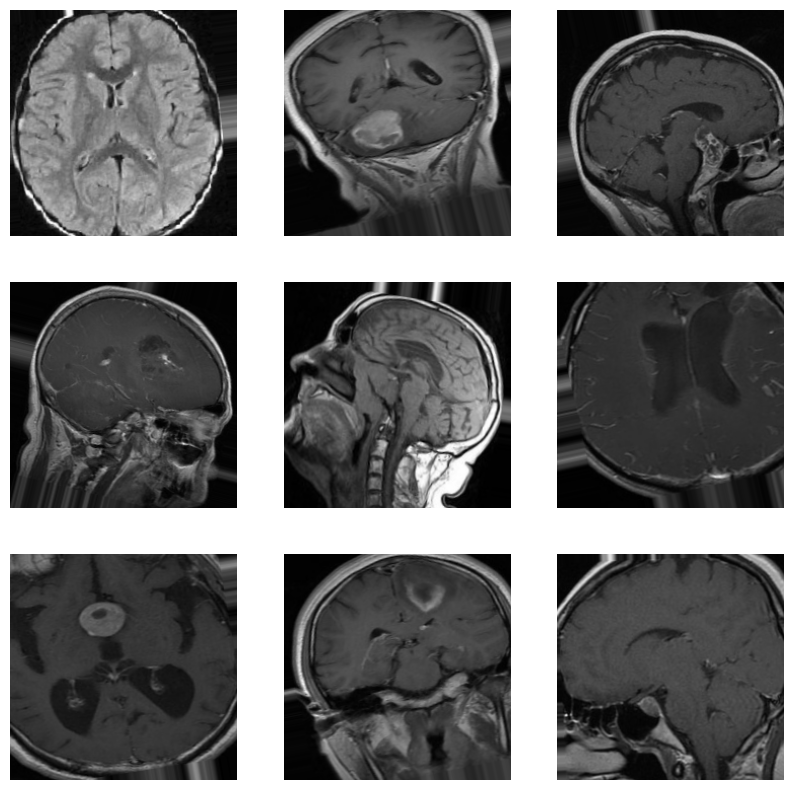

In [28]:
import matplotlib.pyplot as plt

# Visualize a few training samples
x_batch, y_batch = next(train_ds)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers, callbacks

# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras import callbacks

# Callbacks for saving the best model and reducing learning rate on plateau
ckpt_cb = callbacks.ModelCheckpoint("best_transfer_model.h5", save_best_only=True, monitor='val_loss')
reduce_lr_cb = callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    epochs=10,  # You can increase this if you want
    callbacks=[ckpt_cb, reduce_lr_cb]
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 233ms/step - accuracy: 0.8726 - loss: 0.3451 - learning_rate: 1.0000e-04
Epoch 2/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 237ms/step - accuracy: 0.8742 - loss: 0.3334 - learning_rate: 1.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.8857 - loss: 0.3177 - learning_rate: 1.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - accuracy: 0.8909 - loss: 0.2928 - learning_rate: 1.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.9013 - loss: 0.2745 - learning_rate: 1.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.9034 - loss: 0.2728 - learning_rate: 1.0000e-04
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.9119 - loss: 0.2489 - learning_rate: 1.0000e-04
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 245ms/step - accuracy: 0.9152 - loss: 0.2585 - learning_rate: 1.0000e-04
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step - accuracy: 0.9109 - loss: 0.2447 - learning_rate: 1.0000e-04
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 236ms/step - accuracy: 0.9101 

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 544ms/step - accuracy: 0.8549 - loss: 0.3674
Validation Loss: 0.3284955322742462
Validation Accuracy: 0.8703280091285706


KeyError: 'val_loss'

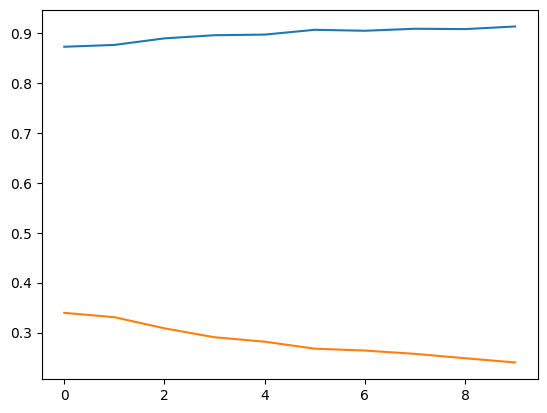

In [ ]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 594ms/step - accuracy: 0.9100 - loss: 0.2479 - learning_rate: 1.0000e-04
Epoch 2/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 550ms/step - accuracy: 0.9243 - loss: 0.2132 - learning_rate: 1.0000e-04
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 523ms/step - accuracy: 0.9229 - loss: 0.2136 - learning_rate: 1.0000e-04
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 538ms/step - accuracy: 0.9302 - loss: 0.1955 - learning_rate: 1.0000e-04
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 543ms/step - accuracy: 0.9206 - loss: 0.2177 - learning_rate: 1.0000e-04
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 574ms/step - accuracy: 0.9256 - loss: 0.2057 - learning_rate: 1.0000e-04
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 611ms/step - accuracy: 0.9348 - loss: 0.1898 - learning_rate: 1.0000e-04
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 543ms/step - accuracy: 0.9262 - loss: 0.1981 - learning_rate: 1.0000e-04
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 552ms/step - accuracy: 0.9244 - loss: 0.2028 - learning_rate: 1.0000e-04
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 563ms/step - accuracy: 0.93

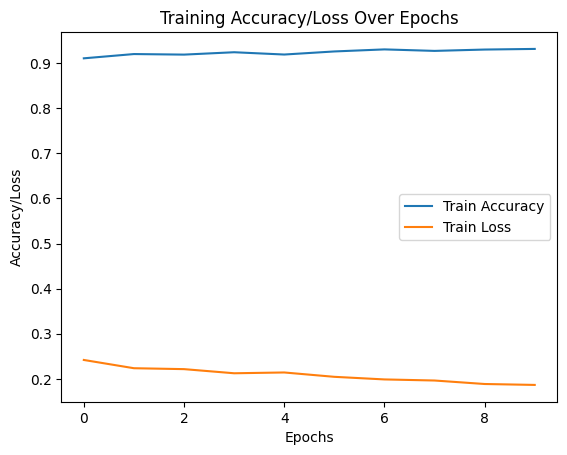

In [37]:
# Train without validation
history = model.fit(
    train_ds,
    epochs=10,
    callbacks=[ckpt_cb, reduce_lr_cb]
)

# Evaluate on test set (val_ds is your test set)
val_loss, val_acc = model.evaluate(val_ds)
print(f"Test Loss: {val_loss}")
print(f"Test Accuracy: {val_acc}")

# Plot only training metrics
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training Accuracy/Loss Over Epochs')
plt.show()